# Import Libraries

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.681. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


# Read Dataset

In [3]:
df = pd.read_csv('train.csv').dropna()
df2 = pd.read_csv('test.csv').dropna()

# Training

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (41397, 5)
    Training Set Memory Usage = 1.90 MB
Test Set Shape = (10125, 5)
    Test Set Memory Usage = 0.46 MB
Single_Label Target: ['online_hours']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 41397 rows, 4 cols
Data Set columns info:
* gender: 0 nulls, 2 unique vals, most common: {'MALE': 31859, 'FEMALE': 9538}
* age: 0 nulls, 58 unique vals, most common: {31: 2144, 26: 1651}
* number_of_kids: 0 nulls, 5 unique vals, most common: {0: 18280, 3: 5937}
* day: 0 nulls, 22 unique vals, most common: {7: 2297, 13: 2296}
------------------------------------------------------

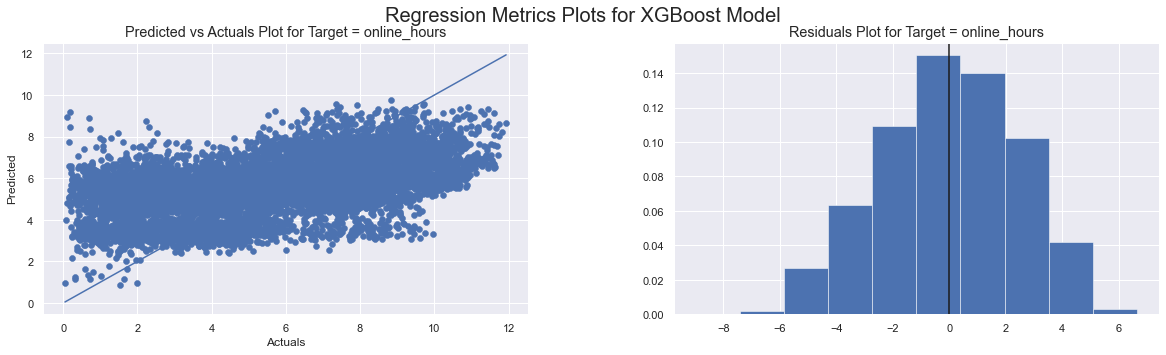

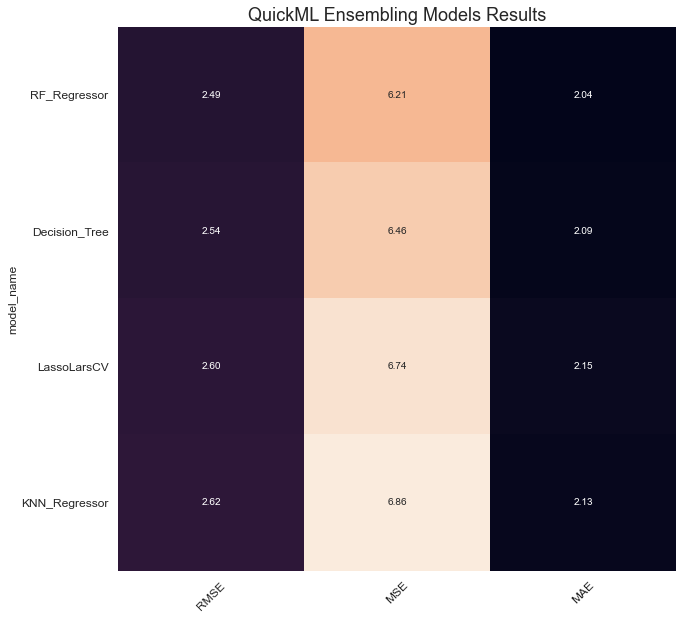

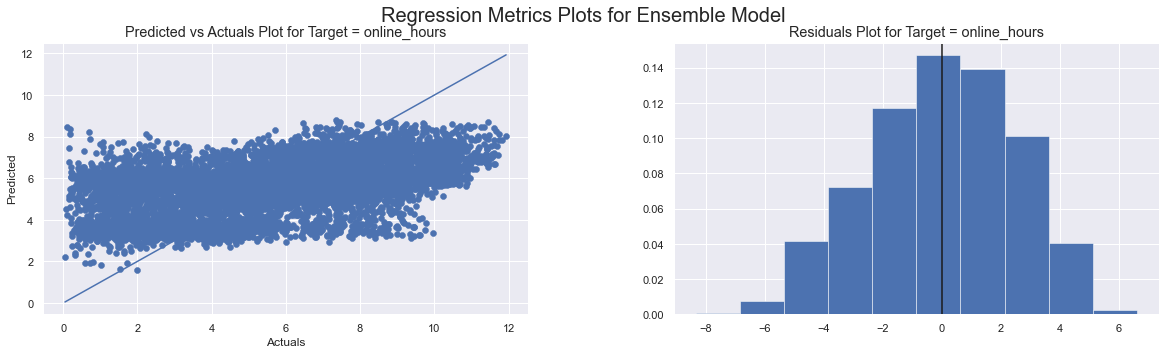

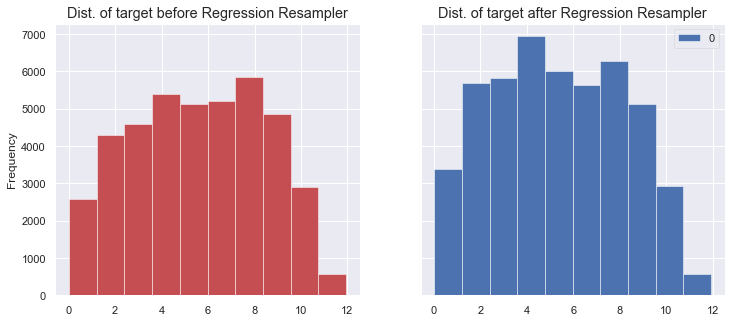

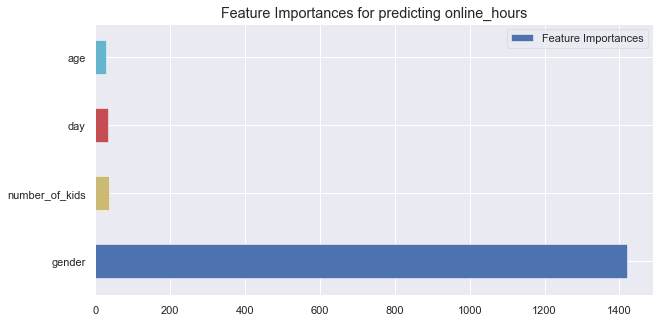

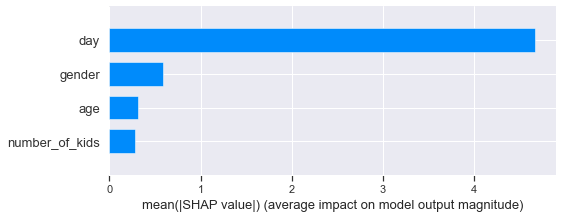

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 40
Writing Output files to disk...
    Saving predictions to .\online_hours\online_hours_Regression_test_modified.csv
    Saving predictions to .\online_hours\online_hours_Regression_submission.csv
    Saving predictions to .\online_hours\online_hours_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 0.7 for the Entire Process


In [4]:
model, features, trainm, testm = Auto_ViML(train = df,
                                           test = df2,
                                           target = 'online_hours',
                                           scoring_parameter ='mean_squared_error',
                                           Imbalanced_Flag = True,
                                           Boosting_Flag=True,
                                           hyper_param ="RS",
                                            verbose = 2)

In [5]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=0,
             grow_policy='depthwise', importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1, nthread=-1,
             num_parallel_tree=1, predictor='cpu_predictor', random_state=1,
             reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, seed=1,
             subsample=0.7, tree_method='hist', updater='grow_colmaker', ...)

# Testing

In [6]:
mean_squared_error(df2['online_hours'], testm['online_hours_Ensembled_predictions'], squared=False)

4.062368285473586